<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

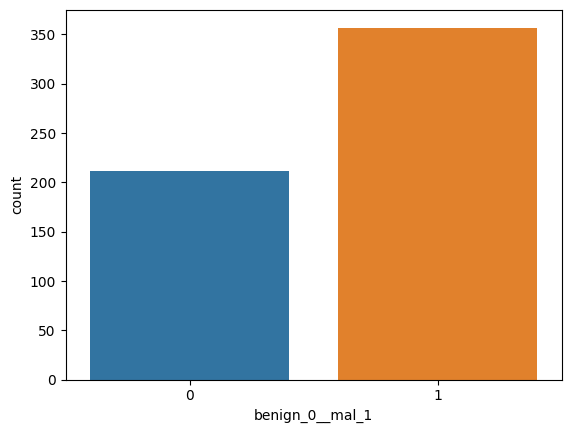

In [6]:
sns.countplot(x = 'benign_0__mal_1',data = df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<Axes: >

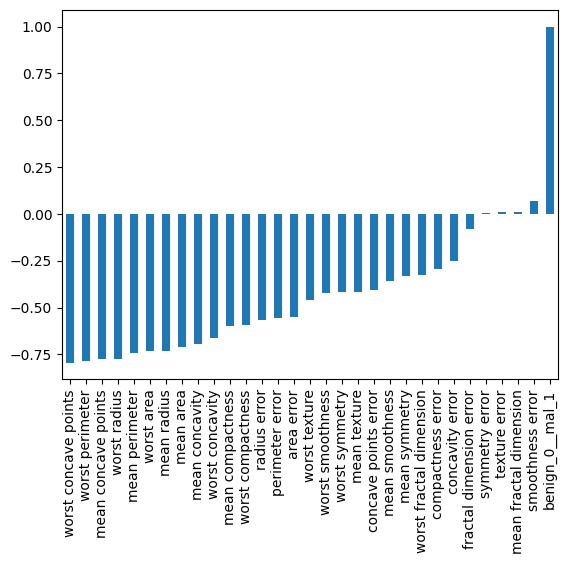

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

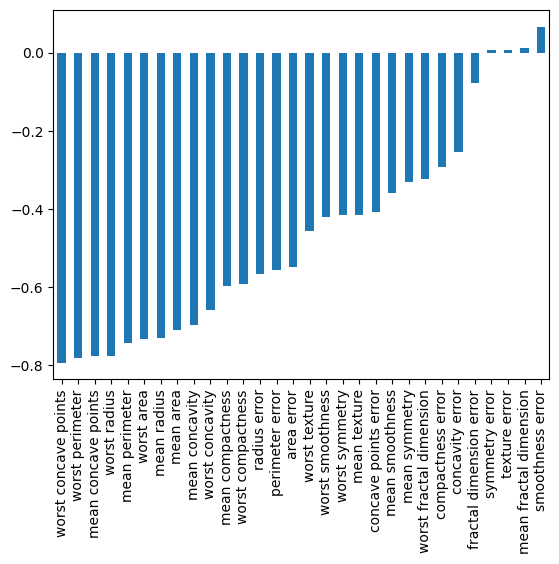

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

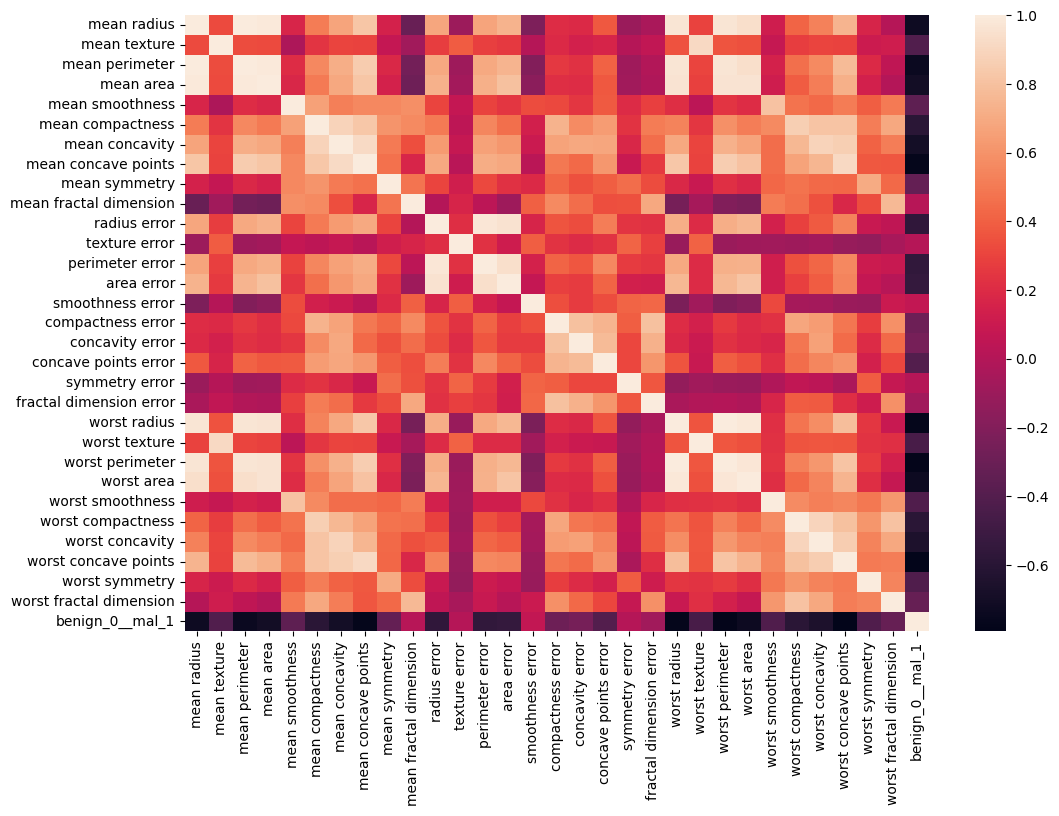

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr())

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [21]:
X_train.shape

(398, 30)

In [24]:
model=Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,
          validation_data = (X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 20ms/step - loss: 0.6585 - val_loss: 0.6542
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6327 - val_loss: 0.6300
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6047 - val_loss: 0.6017
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5718 - val_loss: 0.5676
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5333 - val_loss: 0.5271
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4867 - val_loss: 0.4751
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4303 - val_loss: 0.4203
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3784 - val_loss: 0.3722
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3316 - val_loss: 0.3325
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.2938 - val_loss: 0.2986
Epoch 11

In [27]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,val_loss
0,0.658465,0.654192
1,0.632709,0.630045
2,0.604658,0.601664
3,0.571801,0.567647
4,0.533291,0.527085


<Axes: >

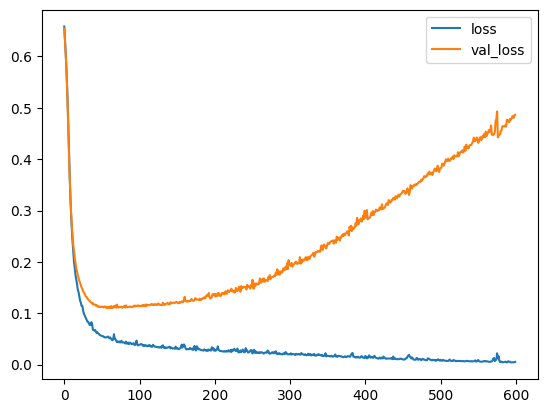

In [33]:
losses.plot()

#Overfitting - the validation loss getting increasing at the end

In [34]:
model=Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

In [37]:
#check every 25 epoches
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose = 1,patience = 25)

In [38]:
model.fit(x = X_train,y=y_train,epochs = 600,validation_data = (X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 1s 17ms/step - loss: 0.6875 - val_loss: 0.6726
Epoch 2/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6559 - val_loss: 0.6398
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.5988
Epoch 4/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5773 - val_loss: 0.5583
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5338 - val_loss: 0.5123
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4877 - val_loss: 0.4670
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4408 - val_loss: 0.4238
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3979 - val_loss: 0.3798
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3574 - val_loss: 0.3448
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3196 - val_loss: 0.3089
Epoch 11

<Axes: >

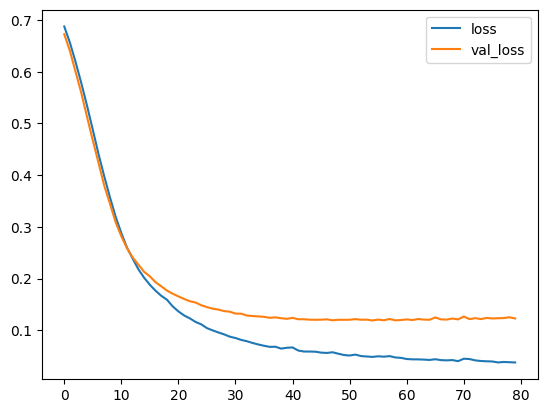

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
from tensorflow.keras.layers import Dropout

In [45]:
model=Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [46]:
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose = 1,patience = 25)
model.fit(x=X_train,y = y_train,epochs = 600,validation_data = (X_test,y_test),
          callbacks = [early_stop])

Epoch 1/600
13/13 [==============================] - 1s 17ms/step - loss: 0.6988 - val_loss: 0.6429
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6418 - val_loss: 0.6173
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6189 - val_loss: 0.5910
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6108 - val_loss: 0.5619
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5599 - val_loss: 0.5344
Epoch 6/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5406 - val_loss: 0.5128
Epoch 7/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5263 - val_loss: 0.4927
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5199 - val_loss: 0.4685
Epoch 9/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4970 - val_loss: 0.4468
Epoch 10/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4864 - val_loss: 0.4272
Epoch 11

<Axes: >

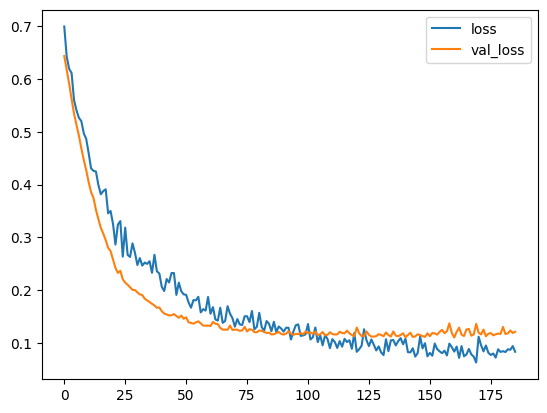

In [47]:
df_model = pd.DataFrame(model.history.history)
df_model.plot()

In [55]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

6/6 [==============================] - 0s 3ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [59]:
print(confusion_matrix(predictions,y_test))

[[ 63   2]
 [  3 103]]
